In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import fiona

ncpath = '/Users/lejoflores/Google Drive/My Drive/_CdA_GEE_data/PRISM_data/'

cda_mon = 'prism_cda_watershed_1991-2020_mon.nc'

sf_cda_mon_nc = 'prism_sf_cda_1991-2020_mon.nc'
lk_cda_mon_nc = 'prism_lk_cda_1991-2020_mon.nc'
up_cda_mon_nc = 'prism_up_cda_1991-2020_mon.nc'
st_joe_mon_nc = 'prism_st_joe_1991-2020_mon.nc'

ws_bnd = 'cda_all_subwatersheds.kml'


In [2]:
ds_sf_cda = xr.open_dataset(ncpath+sf_cda_mon_nc)
ds_lk_cda = xr.open_dataset(ncpath+lk_cda_mon_nc)
ds_up_cda = xr.open_dataset(ncpath+up_cda_mon_nc)
ds_st_joe = xr.open_dataset(ncpath+st_joe_mon_nc)

ds_cda = xr.open_dataset(ncpath+cda_mon)

# Check one dataset 
ds_sf_cda

<xarray.Dataset>
Dimensions:  (time: 360, y: 7, x: 22)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
  * y        (y) float64 47.59 47.56 47.52 47.48 47.45 47.41 47.38
  * x        (x) float64 -116.4 -116.3 -116.3 -116.3 ... -115.7 -115.6 -115.6
Data variables:
    ppt      (time, y, x) float32 ...
    tmean    (time, y, x) float32 ...
    tmin     (time, y, x) float32 ...
    tmax     (time, y, x) float32 ...
    tdmean   (time, y, x) float32 ...
    vpdmin   (time, y, x) float32 ...
    vpdmax   (time, y, x) float32 ...
Attributes:
    transform:               [ 3.59326114e-02  0.00000000e+00 -1.16385728e+02...
    crs:                     +init=epsg:4326
    res:                     [0.03593261 0.03593261]
    is_tiled:                1
    nodatavals:              -32768.0
    scales:                  1.0
    offsets:                 0.0
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

In [3]:
seasonal_cycle_sf_cda = ds_sf_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.month')\
    .mean(dim='time',skipna=True)
seasonal_cycle_lk_cda = ds_lk_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.month')\
    .mean(dim='time',skipna=True)
seasonal_cycle_up_cda = ds_up_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.month')\
    .mean(dim='time',skipna=True)
seasonal_cycle_st_joe = ds_st_joe['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.month')\
    .mean(dim='time',skipna=True)
seasonal_cycle_cda = ds_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.month')\
    .mean(dim='time',skipna=True)

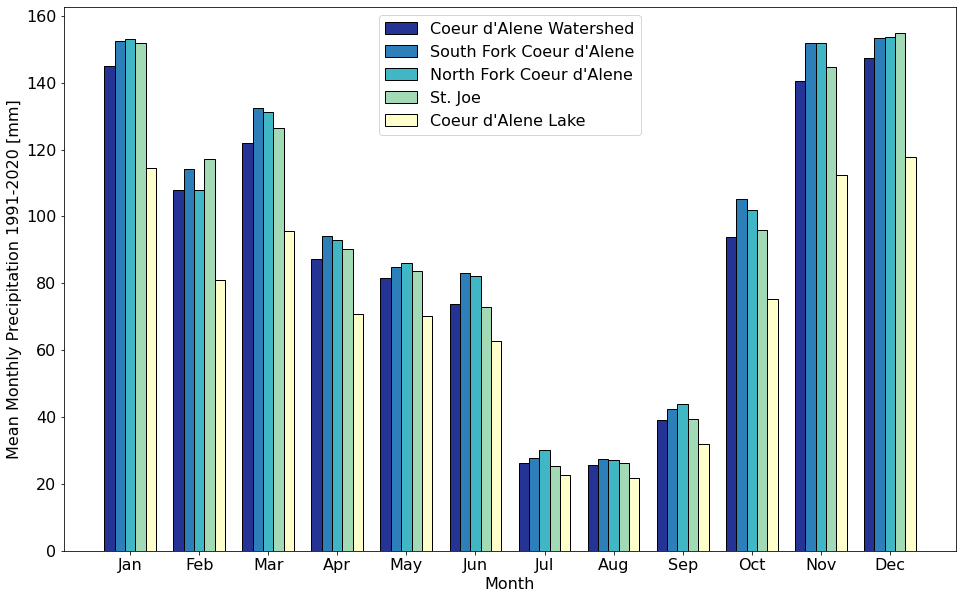

In [4]:
width = 0.15

months = np.arange(12)+1

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
plt.bar(months-2*width, seasonal_cycle_cda, width, color='#253494', edgecolor='black', label='Coeur d\'Alene Watershed')
plt.bar(months-width, seasonal_cycle_sf_cda, width, color='#2c7fb8', edgecolor='black', label='South Fork Coeur d\'Alene')
plt.bar(months, seasonal_cycle_up_cda, width, color='#41b6c4', edgecolor='black', label='North Fork Coeur d\'Alene')
plt.bar(months+width, seasonal_cycle_st_joe, width, color='#a1dab4', edgecolor='black', label='St. Joe')
plt.bar(months+2*width, seasonal_cycle_lk_cda, width, color='#ffffcc', edgecolor='black', label='Coeur d\'Alene Lake')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Mean Monthly Precipitation 1991-2020 [mm]')
plt.legend()
plt.savefig('figs/seasonal_precipitation_cycle.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
seasonal_tmax_cycle_sf_cda = ds_sf_cda['tmax'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmax_cycle_lk_cda = ds_lk_cda['tmax'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmax_cycle_up_cda = ds_up_cda['tmax'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmax_cycle_st_joe = ds_st_joe['tmax'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmax_cycle_cda = ds_cda['tmax'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)

seasonal_tmin_cycle_sf_cda = ds_sf_cda['tmin'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmin_cycle_lk_cda = ds_lk_cda['tmin'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmin_cycle_up_cda = ds_up_cda['tmin'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmin_cycle_st_joe = ds_st_joe['tmin'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmin_cycle_cda = ds_cda['tmin'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)

seasonal_tmean_cycle_sf_cda = ds_sf_cda['tmean'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmean_cycle_lk_cda = ds_lk_cda['tmean'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmean_cycle_up_cda = ds_up_cda['tmean'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmean_cycle_st_joe = ds_st_joe['tmean'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)
seasonal_tmean_cycle_cda = ds_cda['tmean'].groupby('time.month')\
    .mean(dim='time',skipna=True).mean(dim=('x','y'),skipna=True)


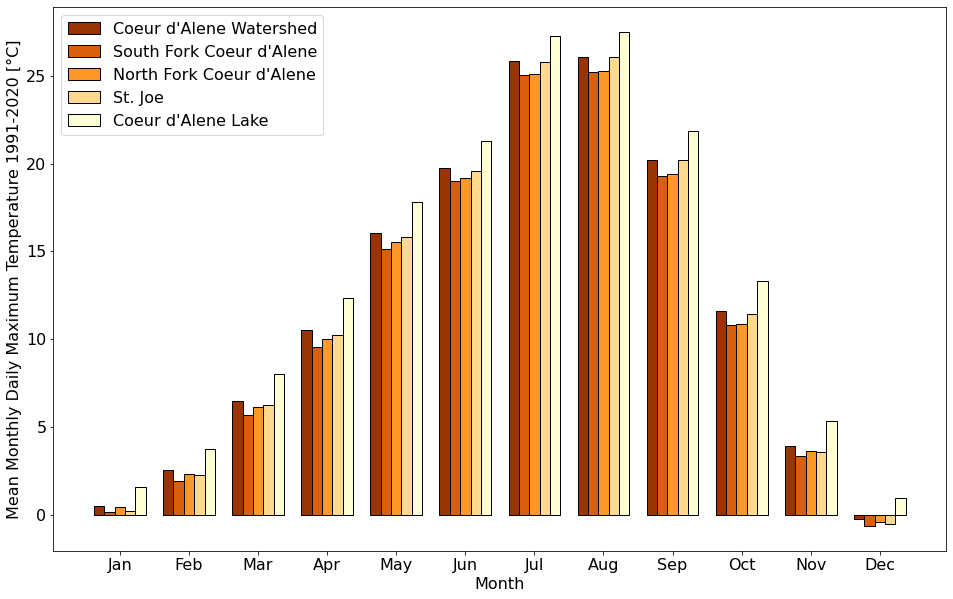

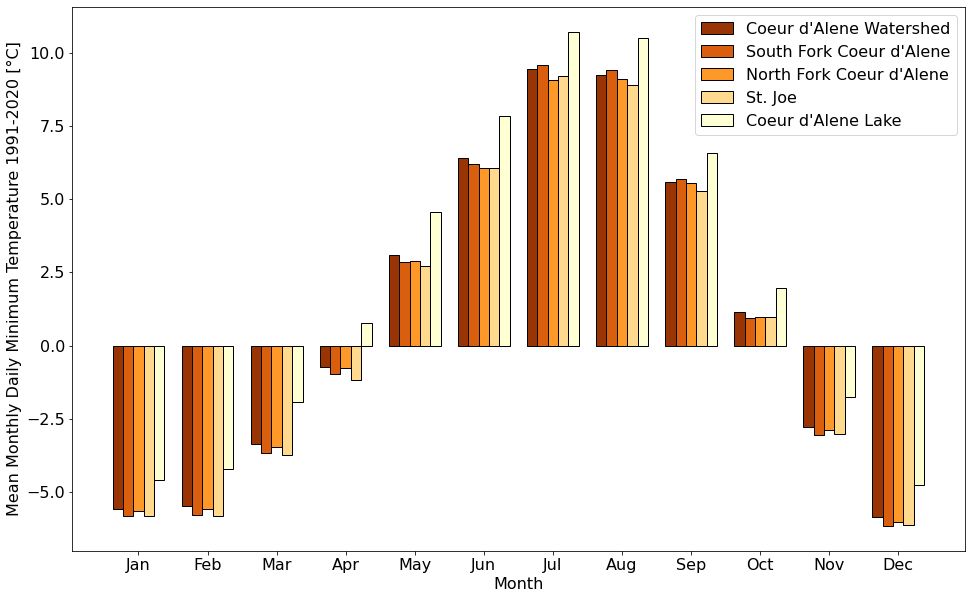

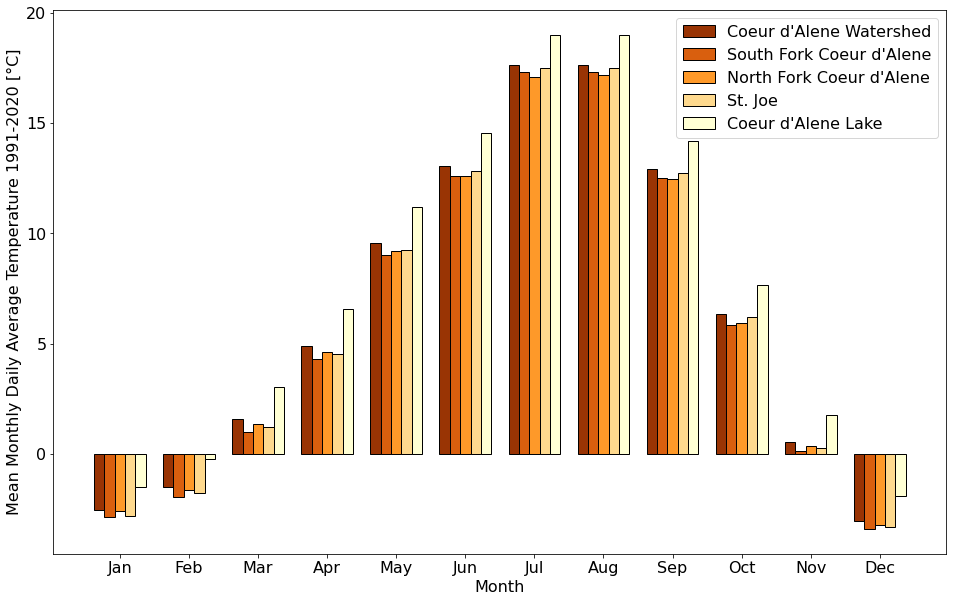

In [6]:
width = 0.15

months = np.arange(12)+1

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
plt.bar(months-2*width, seasonal_tmax_cycle_cda, width, color='#993404', edgecolor='black', label='Coeur d\'Alene Watershed')
plt.bar(months-width, seasonal_tmax_cycle_sf_cda, width, color='#d95f0e', edgecolor='black', label='South Fork Coeur d\'Alene')
plt.bar(months, seasonal_tmax_cycle_up_cda, width, color='#fe9929', edgecolor='black', label='North Fork Coeur d\'Alene')
plt.bar(months+width, seasonal_tmax_cycle_st_joe, width, color='#fed98e', edgecolor='black', label='St. Joe')
plt.bar(months+2*width, seasonal_tmax_cycle_lk_cda, width, color='#ffffd4', edgecolor='black', label='Coeur d\'Alene Lake')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Mean Monthly Daily Maximum Temperature 1991-2020 [°C]')
plt.legend()
plt.savefig('figs/seasonal_tmax_cycle.png', dpi=300, bbox_inches='tight')
plt.show()

width = 0.15

months = np.arange(12)+1

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
plt.bar(months-2*width, seasonal_tmin_cycle_cda, width, color='#993404', edgecolor='black', label='Coeur d\'Alene Watershed')
plt.bar(months-width, seasonal_tmin_cycle_sf_cda, width, color='#d95f0e', edgecolor='black', label='South Fork Coeur d\'Alene')
plt.bar(months, seasonal_tmin_cycle_up_cda, width, color='#fe9929', edgecolor='black', label='North Fork Coeur d\'Alene')
plt.bar(months+width, seasonal_tmin_cycle_st_joe, width, color='#fed98e', edgecolor='black', label='St. Joe')
plt.bar(months+2*width, seasonal_tmin_cycle_lk_cda, width, color='#ffffd4', edgecolor='black', label='Coeur d\'Alene Lake')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Mean Monthly Daily Minimum Temperature 1991-2020 [°C]')
plt.legend()
plt.savefig('figs/seasonal_tmin_cycle.png', dpi=300, bbox_inches='tight')
plt.show()

width = 0.15

months = np.arange(12)+1

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
plt.bar(months-2*width, seasonal_tmean_cycle_cda, width, color='#993404', edgecolor='black', label='Coeur d\'Alene Watershed')
plt.bar(months-width, seasonal_tmean_cycle_sf_cda, width, color='#d95f0e', edgecolor='black', label='South Fork Coeur d\'Alene')
plt.bar(months, seasonal_tmean_cycle_up_cda, width, color='#fe9929', edgecolor='black', label='North Fork Coeur d\'Alene')
plt.bar(months+width, seasonal_tmean_cycle_st_joe, width, color='#fed98e', edgecolor='black', label='St. Joe')
plt.bar(months+2*width, seasonal_tmean_cycle_lk_cda, width, color='#ffffd4', edgecolor='black', label='Coeur d\'Alene Lake')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Mean Monthly Daily Average Temperature 1991-2020 [°C]')
plt.legend()
plt.savefig('figs/seasonal_tmean_cycle.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Compute monthly spatial average precipitation 
annual_ppt_sf_cda = ds_sf_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.year').sum()
annual_ppt_lk_cda = ds_lk_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.year').sum()
annual_ppt_up_cda = ds_up_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.year').sum()
annual_ppt_st_joe = ds_st_joe['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.year').sum()
annual_ppt_cda = ds_cda['ppt'].mean(dim=('x','y'),skipna=True).groupby('time.year').sum()

# Compute monthly spatial average Tmax 
monthly_tmax_sf_cda = ds_sf_cda['tmax'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmax_lk_cda = ds_lk_cda['tmax'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmax_up_cda = ds_up_cda['tmax'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmax_st_joe = ds_st_joe['tmax'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmax_cda = ds_cda['tmax'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)

# Compute monthly spatial average Tmin 
monthly_tmin_sf_cda = ds_sf_cda['tmin'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmin_lk_cda = ds_lk_cda['tmin'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmin_up_cda = ds_up_cda['tmin'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmin_st_joe = ds_st_joe['tmin'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmin_cda = ds_cda['tmin'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)

# Compute monthly spatial average Tmean 
monthly_tmean_sf_cda = ds_sf_cda['tmean'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmean_lk_cda = ds_lk_cda['tmean'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmean_up_cda = ds_up_cda['tmean'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmean_st_joe = ds_st_joe['tmean'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)
monthly_tmean_cda = ds_cda['tmean'].mean(dim=('x','y'),skipna=True).values.reshape(30,12)


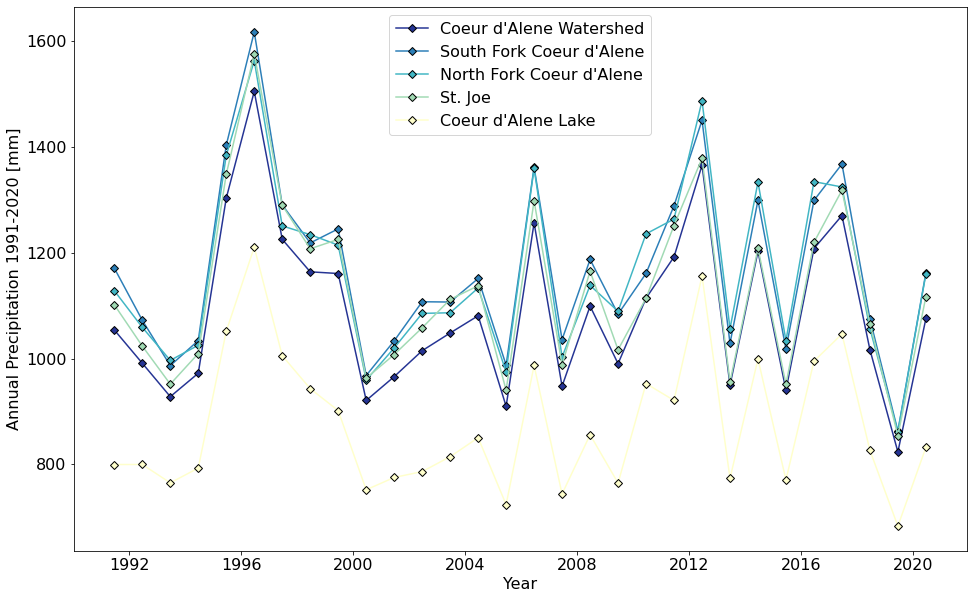

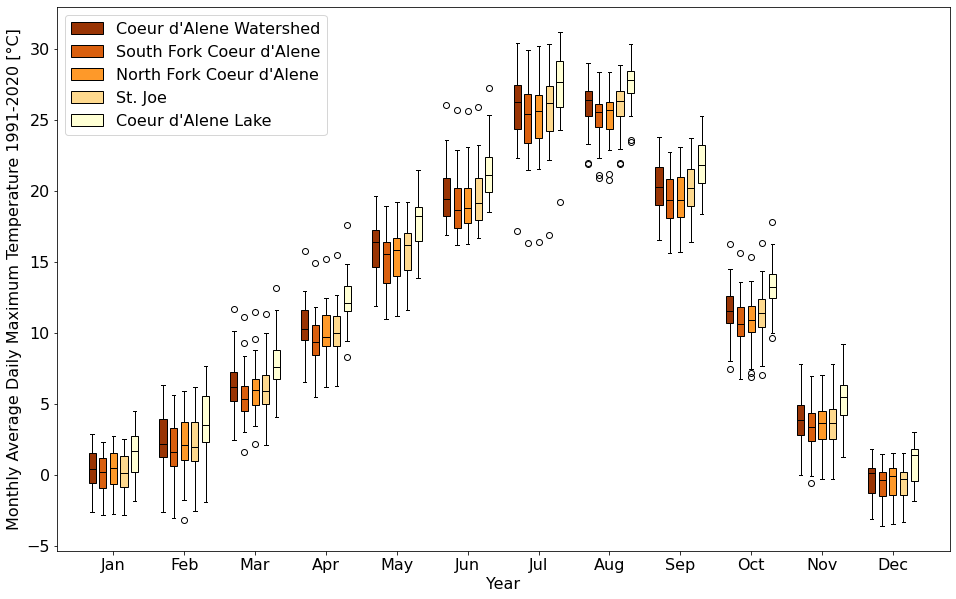

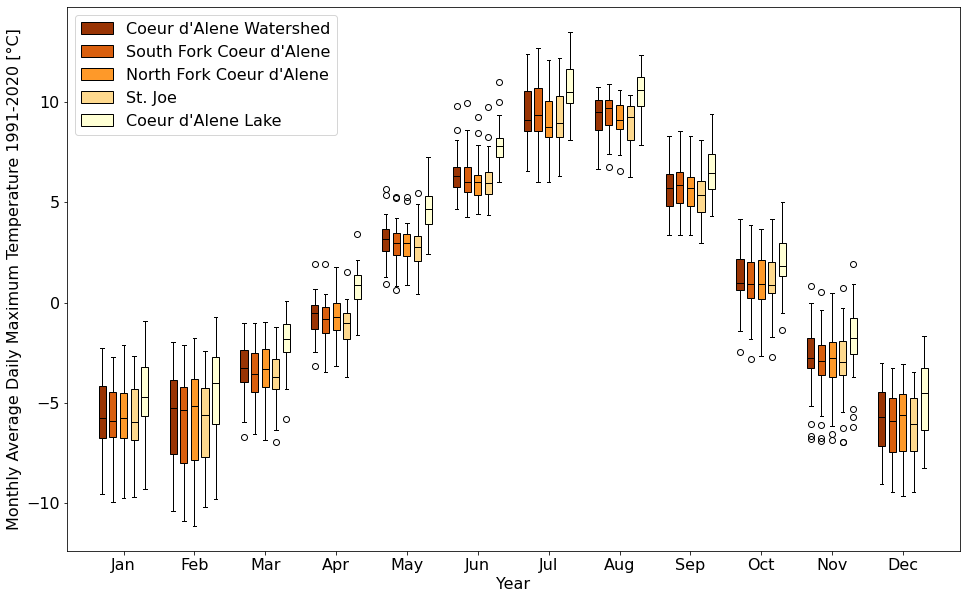

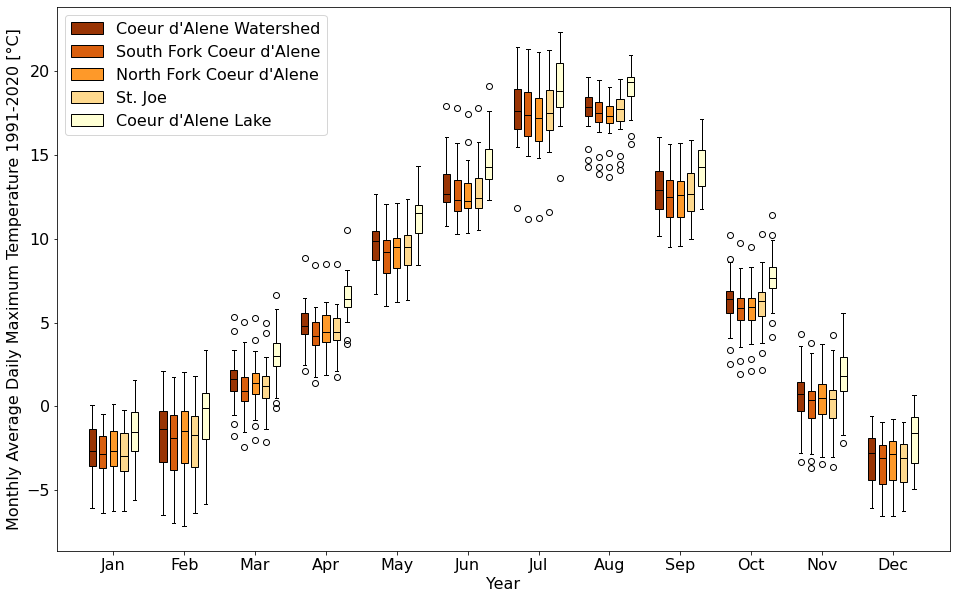

In [8]:
t = ds_cda['time'].groupby('time.year').mean()
months = np.arange(12)+1
width = 0.1

########
# Ppt  #
########

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
plt.plot(t,annual_ppt_cda, marker='D', color='#253494', markeredgecolor='black', label='Coeur d\'Alene Watershed')
plt.plot(t,annual_ppt_sf_cda, marker='D', color='#2c7fb8', markeredgecolor='black', label='South Fork Coeur d\'Alene')
plt.plot(t,annual_ppt_up_cda, marker='D', color='#41b6c4', markeredgecolor='black', label='North Fork Coeur d\'Alene')
plt.plot(t,annual_ppt_st_joe, marker='D', color='#a1dab4', markeredgecolor='black', label='St. Joe')
plt.plot(t,annual_ppt_lk_cda, marker='D', color='#ffffcc', markeredgecolor='black', label='Coeur d\'Alene Lake')
plt.xlabel('Year')
plt.ylabel('Annual Precipitation 1991-2020 [mm]')
plt.legend()
plt.savefig('figs/annual_precipitation_1991-2020.png', dpi=300, bbox_inches='tight')
plt.show()

########
# Tmax #
########

fig, ax = plt.subplots(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
bp1 = ax.boxplot(monthly_tmax_cda, positions=months-3*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#993404', color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp2 = ax.boxplot(monthly_tmax_sf_cda, positions=months-1.5*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#d95f0e',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp3 = ax.boxplot(monthly_tmax_up_cda, positions=months, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#fe9929',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp4 = ax.boxplot(monthly_tmax_st_joe, positions=months+1.5*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#fed98e',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp5 = ax.boxplot(monthly_tmax_lk_cda, positions=months+3*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#ffffd4',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.xlabel('Year')
plt.ylabel('Monthly Average Daily Maximum Temperature 1991-2020 [°C]')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], bp5['boxes'][0]],
           ['Coeur d\'Alene Watershed','South Fork Coeur d\'Alene','North Fork Coeur d\'Alene','St. Joe','Coeur d\'Alene Lake'])
plt.savefig('figs/monthly_tmax_variability_1991-2020.png', dpi=300, bbox_inches='tight')
plt.show()

########
# Tmin #
########

fig, ax = plt.subplots(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
bp1 = ax.boxplot(monthly_tmin_cda, positions=months-3*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#993404', color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp2 = ax.boxplot(monthly_tmin_sf_cda, positions=months-1.5*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#d95f0e',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp3 = ax.boxplot(monthly_tmin_up_cda, positions=months, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#fe9929',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp4 = ax.boxplot(monthly_tmin_st_joe, positions=months+1.5*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#fed98e',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp5 = ax.boxplot(monthly_tmin_lk_cda, positions=months+3*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#ffffd4',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.xlabel('Year')
plt.ylabel('Monthly Average Daily Maximum Temperature 1991-2020 [°C]')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], bp5['boxes'][0]],
           ['Coeur d\'Alene Watershed','South Fork Coeur d\'Alene','North Fork Coeur d\'Alene','St. Joe','Coeur d\'Alene Lake'])
plt.savefig('figs/monthly_tmin_variability_1991-2020.png', dpi=300, bbox_inches='tight')
plt.show()

#########
# Tmean #
#########

fig, ax = plt.subplots(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
bp1 = ax.boxplot(monthly_tmean_cda, positions=months-3*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#993404', color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp2 = ax.boxplot(monthly_tmean_sf_cda, positions=months-1.5*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#d95f0e',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp3 = ax.boxplot(monthly_tmean_up_cda, positions=months, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#fe9929',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp4 = ax.boxplot(monthly_tmean_st_joe, positions=months+1.5*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#fed98e',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
bp5 = ax.boxplot(monthly_tmean_lk_cda, positions=months+3*width, widths=width, patch_artist=True, 
            boxprops=dict(facecolor='#ffffd4',color='black'), capprops=dict(color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'))
plt.xlabel('Year')
plt.ylabel('Monthly Average Daily Maximum Temperature 1991-2020 [°C]')
plt.xticks(months,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                  'Sep','Oct','Nov','Dec'])
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], bp5['boxes'][0]],
           ['Coeur d\'Alene Watershed','South Fork Coeur d\'Alene','North Fork Coeur d\'Alene','St. Joe','Coeur d\'Alene Lake'])
plt.savefig('figs/monthly_tmean_variability_1991-2020.png', dpi=300, bbox_inches='tight')
plt.show()


In [9]:
df_ppt = pd.DataFrame()

df_ppt['year'] = annual_ppt_cda.year
df_ppt = df_ppt.set_index('year')

df_ppt['ppt_cda'] = annual_ppt_cda.values
df_ppt['ppt_sf_cda'] = annual_ppt_sf_cda.values
df_ppt['ppt_up_cda'] = annual_ppt_up_cda.values
df_ppt['ppt_st_joe'] = annual_ppt_st_joe.values
df_ppt['ppt_lk_cda'] = annual_ppt_lk_cda.values
df_ppt

,ppt_cda,ppt_sf_cda,ppt_up_cda,ppt_st_joe,ppt_lk_cda
year,,,,,
1991,1054.405762,1171.285034,1128.606201,1102.015381,799.939758
1992,991.401917,1072.609863,1059.228638,1023.838135,799.988647
1993,928.224854,986.875977,996.785645,951.861572,765.296509
1994,972.483643,1034.344482,1025.479370,1009.729858,793.189514
1995,1303.314697,1403.483521,1384.145020,1348.244507,1051.648071
1996,1505.246948,1617.719360,1563.446777,1576.373779,1210.739502
1997,1225.650269,1290.721313,1251.050537,1290.103394,1005.699402
1998,1164.188232,1218.798096,1234.446045,1207.832764,943.413452
1999,1161.019409,1245.381348,1214.740967,1225.503906,901.934387


In [10]:
df_ppt.mean(axis=0)

ppt_cda       1090.126587
ppt_sf_cda    1169.412842
ppt_up_cda    1162.042969
ppt_st_joe    1128.747681
ppt_lk_cda     876.241394
dtype: float32

In [11]:
df_ppt.min(axis=0)

ppt_cda       823.721558
ppt_sf_cda    863.077087
ppt_up_cda    861.928833
ppt_st_joe    854.422180
ppt_lk_cda    683.551025
dtype: float32

In [12]:
df_ppt.max(axis=0)

ppt_cda       1505.246948
ppt_sf_cda    1617.719360
ppt_up_cda    1563.446777
ppt_st_joe    1576.373779
ppt_lk_cda    1210.739502
dtype: float32

In [13]:
ds_cda_seas_mean = ds_cda.groupby('time.season').mean(dim='time').sortby(xr.DataArray(['DJF','MAM','JJA','SON'],dims=['season']))
ds_cda_seas_mean

<xarray.Dataset>
Dimensions:  (season: 4, y: 33, x: 57)
Coordinates:
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
  * y        (y) float64 48.06 48.02 47.99 47.95 ... 47.02 46.98 46.95 46.91
  * x        (x) float64 -117.1 -117.1 -117.0 -117.0 ... -115.1 -115.1 -115.1
Data variables:
    ppt      (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    tmean    (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    tmin     (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    tmax     (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    tdmean   (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vpdmin   (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vpdmax   (season, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan

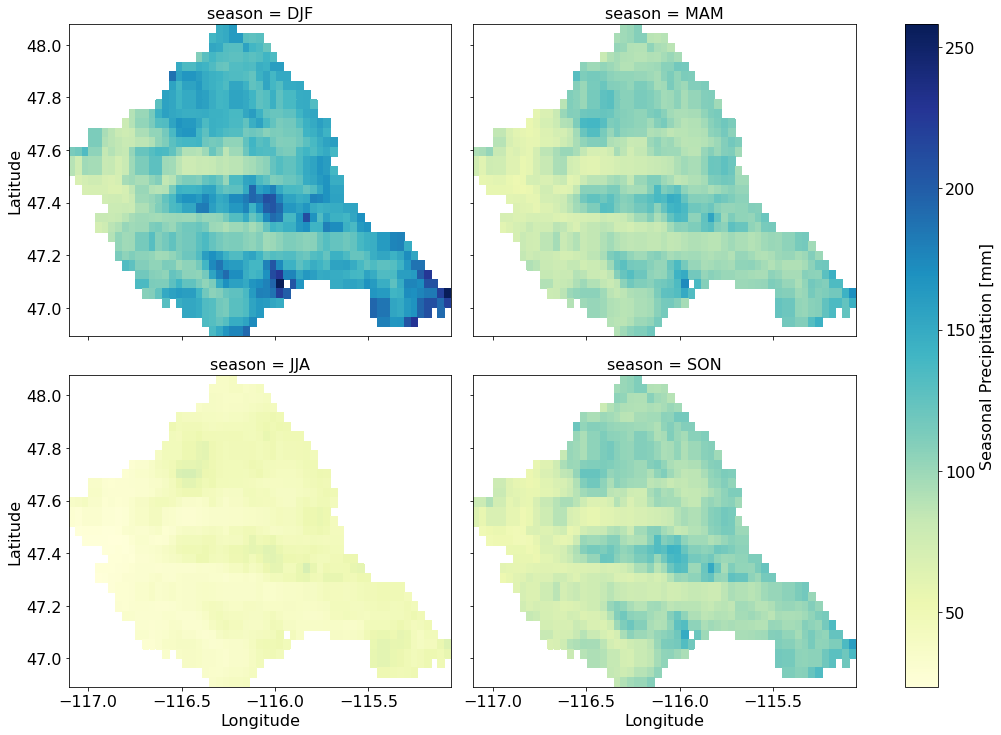

In [14]:
ppt_seas_plt = ds_cda_seas_mean['ppt'].plot.pcolormesh('x','y', col='season', figsize=(15,10.5), col_wrap=2, cmap='YlGnBu',
                                           aspect=1, cbar_kwargs=dict(label='Seasonal Precipitation [mm]'))
ppt_seas_plt.set_xlabels('Longitude')
ppt_seas_plt.set_ylabels('Latitude')

ppt_seas_plt.fig.savefig('figs/ppt_seasonal_map.png', dpi=300, bbox_inches='tight')

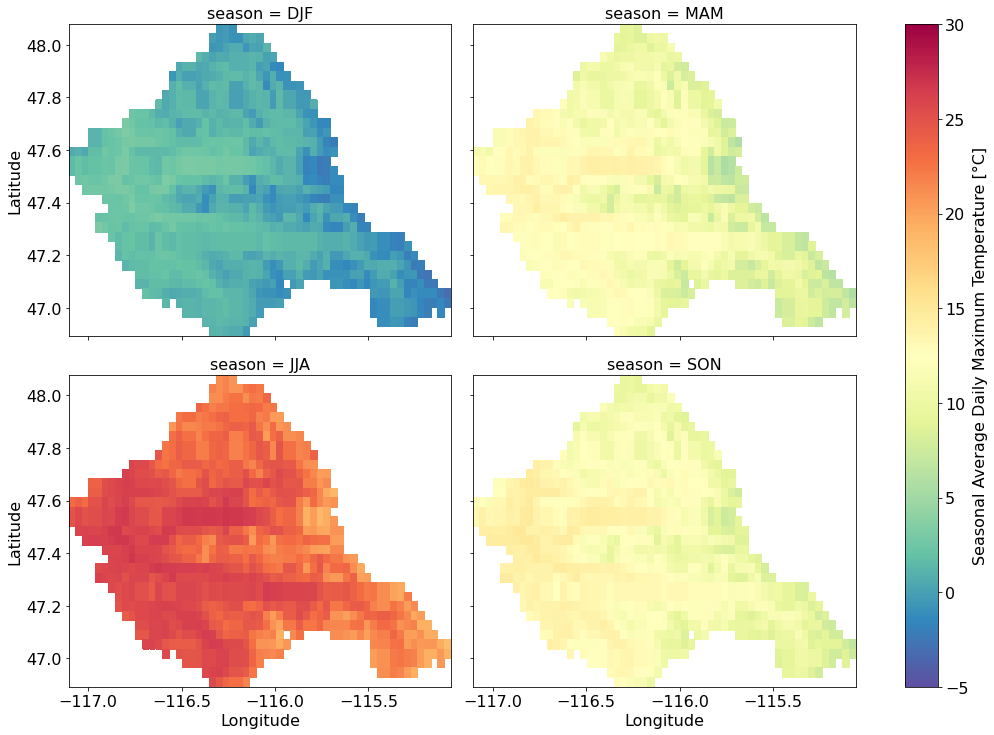

In [15]:
ppt_seas_plt = ds_cda_seas_mean['tmax'].plot.pcolormesh('x','y', col='season', col_wrap=2, figsize=(15,10.5), vmin=-5, vmax=30, cmap='Spectral_r',
                                           aspect=1, cbar_kwargs=dict(label='Seasonal Average Daily Maximum Temperature [°C]'))
ppt_seas_plt.set_xlabels('Longitude')
ppt_seas_plt.set_ylabels('Latitude')

ppt_seas_plt.fig.savefig('figs/tmax_seasonal_map.png', dpi=300, bbox_inches='tight')

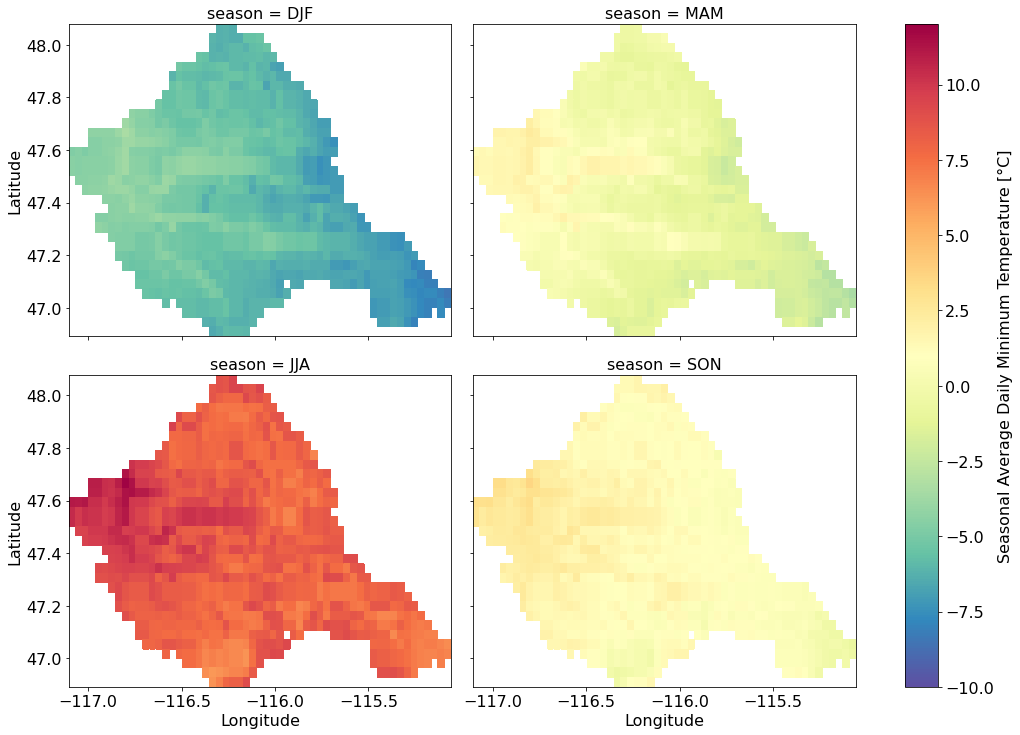

In [16]:
ppt_seas_plt = ds_cda_seas_mean['tmin'].plot.pcolormesh('x','y', col='season', col_wrap=2, figsize=(15,10.5), vmin=-10, vmax=12, cmap='Spectral_r',
                                           aspect=1, cbar_kwargs=dict(label='Seasonal Average Daily Minimum Temperature [°C]'))
ppt_seas_plt.set_xlabels('Longitude')
ppt_seas_plt.set_ylabels('Latitude')

ppt_seas_plt.fig.savefig('figs/tmin_seasonal_map.png', dpi=300, bbox_inches='tight')

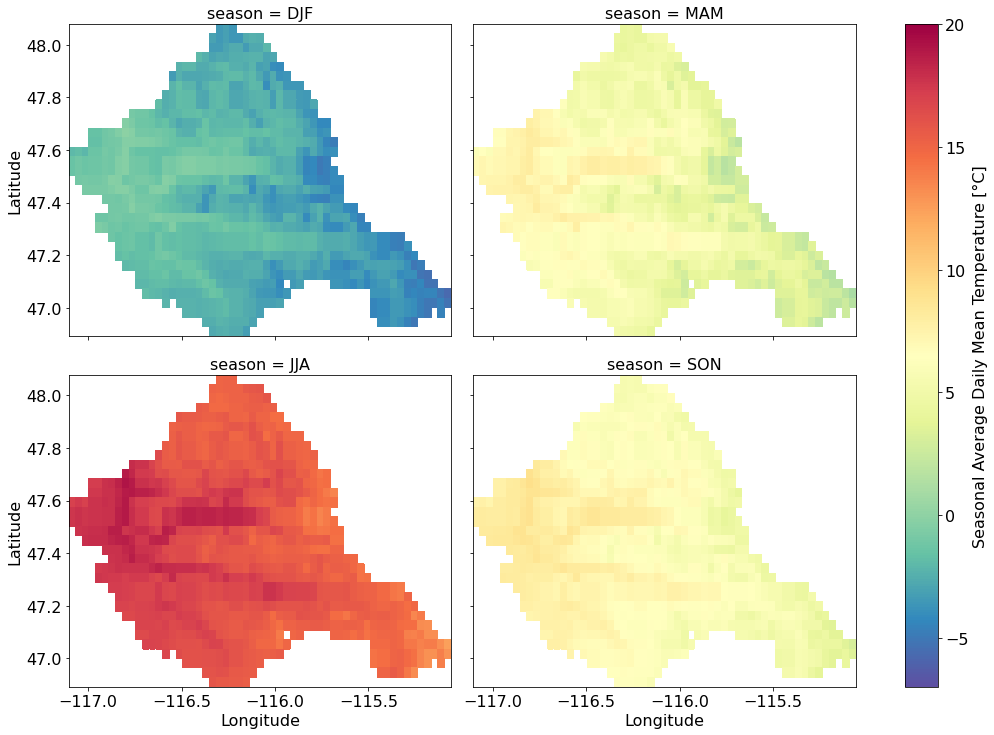

In [17]:
ppt_seas_plt = ds_cda_seas_mean['tmean'].plot.pcolormesh('x','y', col='season', col_wrap=2, figsize=(15,10.5), vmin=-7, vmax=20, cmap='Spectral_r',
                                           aspect=1, cbar_kwargs=dict(label='Seasonal Average Daily Mean Temperature [°C]'))
ppt_seas_plt.set_xlabels('Longitude')
ppt_seas_plt.set_ylabels('Latitude')

ppt_seas_plt.fig.savefig('figs/tmean_seasonal_map.png', dpi=300, bbox_inches='tight')

<ipython-input-18-db1a48153b9c>:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


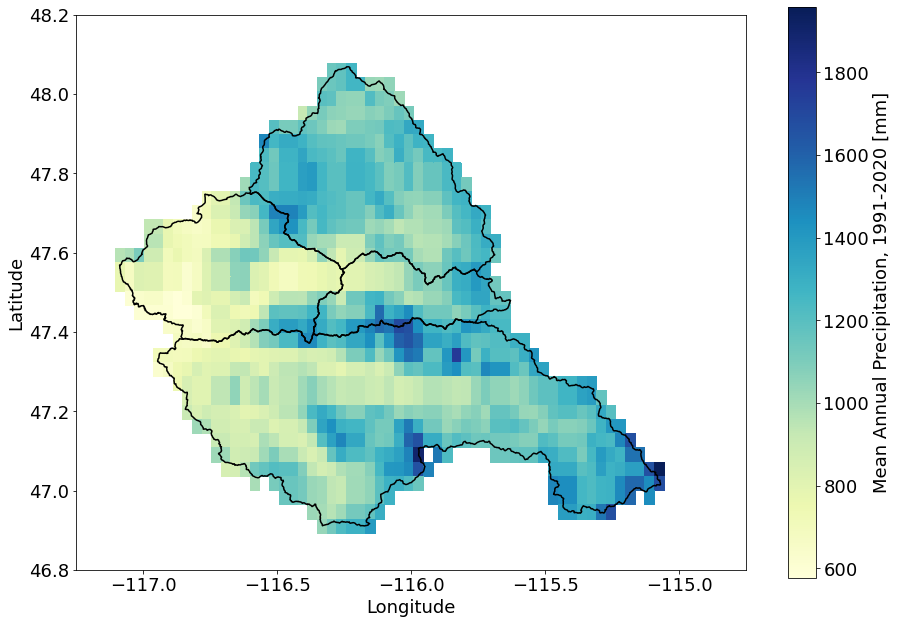

In [18]:
ds_cda_map = ds_cda['ppt'].groupby('time.year').sum(dim='time', skipna=False).mean(dim='year', skipna=False)

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
shape=gpd.read_file(ws_bnd, driver='KML')

plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(figsize=(15,10.5))
pcp = ax.pcolormesh(ds_cda_map['x'], ds_cda_map['y'], ds_cda_map, shading='auto', cmap='YlGnBu')
shape.boundary.plot(edgecolor='black',ax=ax)
ax.set_xlim([-117.25,-114.75])
ax.set_ylim([46.8,48.2])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
fig.colorbar(pcp,label='Mean Annual Precipitation, 1991-2020 [mm]')
fig.savefig('figs/mean_annual_precipitation_map.png', dpi=300, bbox_inches='tight')

fig.show()